<a href="https://colab.research.google.com/github/santmukhgit/Capstone-Computer-Vision/blob/main/Milestone1_CV2_with_png_Cls_Rpt_Googlenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

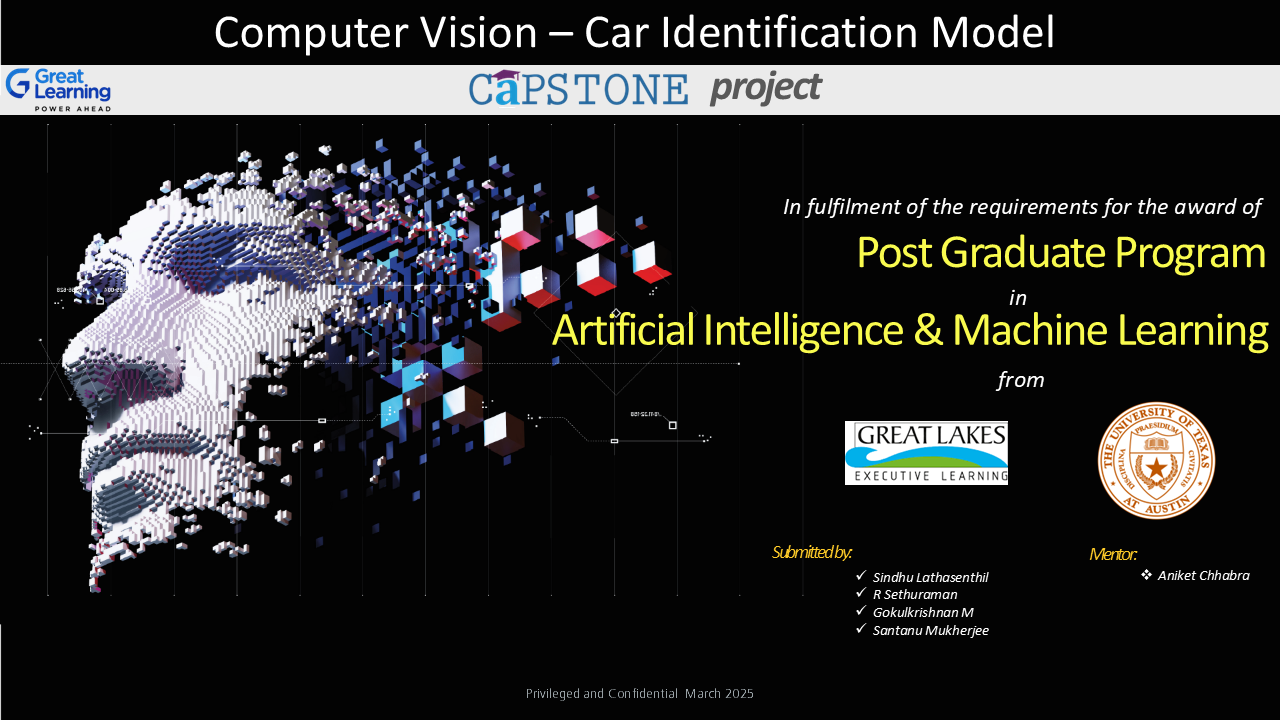

#**COMPUTER VISION CAPSTONE PROJECT AIML OBJECT DETECTION - CAR**

In [16]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the columns
table.field_names = ["S.NO", "Contents", "Cell Number"]

# Add rows
table.add_row([1, "Problem Statement", 8 ])
table.add_row([2, "Introduction", 10])
table.add_row([3, "Libraries Used", 12])
table.add_row([4, "Data Handling", 14 ])
table.add_row(["4A", "Data Handling - Import Data", 15 ])
table.add_row(["4B", "Data Handling - Map Images w.r.t Classes", 14 ])
table.add_row(["4C", "Data Handling - Map Images w.r.t Annotations", 14 ])
table.add_row([5, "Display Result - bounding box", 16 ])
table.add_row([6, "Design Basic CNN Models", 17 ])
table.add_row(["6A", "MobileNetV2 CNN Model", 17 ])
table.add_row(["6B", "Google CNN Model", 17 ])
table.add_row(["6C", "AlexNet CNN Model", 17 ])
table.add_row(["6D", "U-Net CNN Model", 17 ])
table.add_row(["7", "Summary", 17 ])




# Print the table
print(table)

+------+----------------------------------------------+-------------+
| S.NO |                   Contents                   | Cell Number |
+------+----------------------------------------------+-------------+
|  1   |              Problem Statement               |      8      |
|  2   |                 Introduction                 |      10     |
|  3   |                Libraries Used                |      12     |
|  4   |                Data Handling                 |      14     |
|  4A  |         Data Handling - Import Data          |      15     |
|  4B  |   Data Handling - Map Images w.r.t Classes   |      14     |
|  4C  | Data Handling - Map Images w.r.t Annotations |      14     |
|  5   |        Display Result - bounding box         |      16     |
|  6   |           Design Basic CNN Models            |      17     |
|  6A  |            MobileNetV2 CNN Model             |      17     |
|  6B  |               Google CNN Model               |      17     |
|  6C  |            

1. Problem Statement



Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of
the car, type, colour, number plates etc.

Design a DL based car identification model.

2. Introduction

The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g.
2012 Tesla Model S or 2012 BMW M3 coupe.

Data description:

‣ Train Images: Consists of real images of cars as per the make and year of the car.

‣ Test Images: Consists of real images of cars as per the make and year of the car.

‣ Train Annotation: Consists of bounding box region for training images.

‣ Test Annotation: Consists of bounding box region for testing images.


3. Libraries Used

In [17]:

import os
import zipfile
import glob # for file path handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualization
import matplotlib.patches as patches
import seaborn as sns
from PIL import Image # For image loading and manipulation
import xml.etree.ElementTree as ET # For handling XML annotations (common for object detection datasets)

import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionV3

4. Data Handling



4A. Data Handling - Import Data

In [18]:
# Define file paths
car_names_file = 'Car names and make.csv'
annotations_zip_file = 'Annotations.zip'
images_zip_file = 'Car Images.zip'

# Step 1: Load the car names and make data
car_names_df = pd.read_csv(car_names_file)

# Display the first few rows of the DataFrame
print("Car Names and Makes:")
print(car_names_df.head())

# Step 2: Extract Annotations.zip
with zipfile.ZipFile(annotations_zip_file, 'r') as zip_ref:
    zip_ref.extractall('Annotations')

# List the extracted files
print("\nExtracted Annotations:")
print(os.listdir('Annotations'))

# Step 3: Extract Car Images.zip
with zipfile.ZipFile(images_zip_file, 'r') as zip_ref:
    zip_ref.extractall('Car_Images')

# List the extracted files
print("\nExtracted Car Images:")
print(os.listdir('Car_Images'))

Car Names and Makes:
  AM General Hummer SUV 2000
0        Acura RL Sedan 2012
1        Acura TL Sedan 2012
2       Acura TL Type-S 2008
3       Acura TSX Sedan 2012
4  Acura Integra Type R 2001

Extracted Annotations:
['Annotations', 'Test Annotation.csv', 'Train Annotations.csv']

Extracted Car Images:
['Car Images']


In [19]:
# Load the training annotations
train_annotations_path = r'Train Annotations.csv'  # Adjust the path as necessary
train_annotations_df = pd.read_csv(train_annotations_path)
print("Training Annotations Columns:")
print(train_annotations_df.columns)
train_annotations_df.head(5)

Training Annotations Columns:
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        39         116         569         375   
1  00002.jpg                        36         116         868         587   
2  00003.jpg                        85         109         601         381   
3  00004.jpg                       621         393        1484        1096   
4  00005.jpg                        14          36         133          99   

   Image class  
0           14  
1            3  
2           91  
3          134  
4          106

In [20]:
# Load the Test annotations
test_annotations_path = r'Test Annotation.csv'  # Adjust the path as necessary
test_annotations_df = pd.read_csv(test_annotations_path)
print("Test Annotations Columns:")
print(test_annotations_df.columns)
test_annotations_df.head(5)

Test Annotations Columns:
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        30          52         246         147   
1  00002.jpg                       100          19         576         203   
2  00003.jpg                        51         105         968         659   
3  00004.jpg                        67          84         581         407   
4  00005.jpg                       140         151         593         339   

   Image class  
0          181  
1          103  
2          145  
3          187  
4          185

In [21]:
# Renaming column names
train_annotations_df = train_annotations_df.rename(columns={'Bounding Box coordinates':'Bounding Box coordinates_xmin','Unnamed: 2':'Bounding Box coordinates_ymin','Unnamed: 3':'Bounding Box coordinates_xmax','Unnamed: 4':'Bounding Box coordinates_ymax'})
train_annotations_df.head(5)

Image Name  Bounding Box coordinates_xmin  Bounding Box coordinates_ymin  \
0  00001.jpg                             39                            116   
1  00002.jpg                             36                            116   
2  00003.jpg                             85                            109   
3  00004.jpg                            621                            393   
4  00005.jpg                             14                             36   

   Bounding Box coordinates_xmax  Bounding Box coordinates_ymax  Image class  
0                            569                            375           14  
1                            868                            587            3  
2                            601                            381           91  
3                           1484                           1096          134  
4                            133                             99          106

In [22]:
# Renaming column names
test_annotations_df = test_annotations_df.rename(columns={'Bounding Box coordinates':'Bounding Box coordinates_xmin','Unnamed: 2':'Bounding Box coordinates_ymin','Unnamed: 3':'Bounding Box coordinates_xmax','Unnamed: 4':'Bounding Box coordinates_ymax'})
test_annotations_df.head(5)

Image Name  Bounding Box coordinates_xmin  Bounding Box coordinates_ymin  \
0  00001.jpg                             30                             52   
1  00002.jpg                            100                             19   
2  00003.jpg                             51                            105   
3  00004.jpg                             67                             84   
4  00005.jpg                            140                            151   

   Bounding Box coordinates_xmax  Bounding Box coordinates_ymax  Image class  
0                            246                            147          181  
1                            576                            203          103  
2                            968                            659          145  
3                            581                            407          187  
4                            593                            339          185

In [23]:
# for images
train_images_path = os.path.join('Car_Images/Car Images/Train Images')
test_images_path = os.path.join('Car_Images/Car Images/Test Images')

4B. Data Handling - Map Images w.r.t Classes

In [24]:
train_class_folders = [f.path for f in os.scandir(train_images_path) if f.is_dir()]

train_image_classes = {} # Dictionary to store training image: class mapping

# Define columns for the Training DataFrame
columns_training = ['Image_Path', 'labels']

# Create an empty DataFrame
df_training = pd.DataFrame(columns=columns_training)

# --- Map filenames in a class for train_image_classes
for class_folder in train_class_folders:
     class_name = os.path.basename(class_folder) # Extract class name from folder name
     #labels_train.append(class_name)
     image_files = glob.glob(os.path.join(class_folder, '*.jpg')) # images are .jpg
     for image_file in image_files:
         train_image_classes[os.path.basename(image_file)] = class_name # Map filename to class
         #image_file_path_training.append(image_file)
         df_training.loc[len(df_training)] = [image_file, class_name]


print(df_training.head(10))

# --- Print a few mappings to verify ---
print("Sample Training Image to Class Mappings:")
count = 0
for img_name, class_label in train_image_classes.items():
    print(f"{img_name}: {class_label}")
    count += 1
    if count > 5: break # Print first few only



                                          Image_Path  \
0  Car_Images/Car Images/Train Images\Acura Integ...   
1  Car_Images/Car Images/Train Images\Acura Integ...   
2  Car_Images/Car Images/Train Images\Acura Integ...   
3  Car_Images/Car Images/Train Images\Acura Integ...   
4  Car_Images/Car Images/Train Images\Acura Integ...   
5  Car_Images/Car Images/Train Images\Acura Integ...   
6  Car_Images/Car Images/Train Images\Acura Integ...   
7  Car_Images/Car Images/Train Images\Acura Integ...   
8  Car_Images/Car Images/Train Images\Acura Integ...   
9  Car_Images/Car Images/Train Images\Acura Integ...   

                      labels  
0  Acura Integra Type R 2001  
1  Acura Integra Type R 2001  
2  Acura Integra Type R 2001  
3  Acura Integra Type R 2001  
4  Acura Integra Type R 2001  
5  Acura Integra Type R 2001  
6  Acura Integra Type R 2001  
7  Acura Integra Type R 2001  
8  Acura Integra Type R 2001  
9  Acura Integra Type R 2001  
Sample Training Image to Class Mappings:
0

In [25]:
test_class_folders = [f.path for f in os.scandir(test_images_path) if f.is_dir()]
test_image_classes = {}  # Dictionary to store testing image: class mapping

# Define columns for the Testing DataFrame
columns_testing = ['Image_Path', 'labels']

# Create an empty DataFrame
df_testing = pd.DataFrame(columns=columns_testing)

# similar logic for test_images_path and test_image_classes
for class_folder in test_class_folders:
     class_name = os.path.basename(class_folder) # Extract class name from folder name
     #labels_testing.append(class_name)
     image_files = glob.glob(os.path.join(class_folder, '*.jpg')) # images are .jpg
     for image_file in image_files:
         test_image_classes[os.path.basename(image_file)] = class_name # Map filename to class
         #image_file_path_testing.append(image_file)
         df_testing.loc[len(df_testing)] = [image_file, class_name]

print(df_testing.head(10))

print("Sample Testing Image to Class Mappings:")
count = 0
for img_name, class_label in test_image_classes.items():
    print(f"{img_name}: {class_label}")
    count += 1
    if count > 5: break # Print first few only



                                          Image_Path  \
0  Car_Images/Car Images/Test Images\Acura Integr...   
1  Car_Images/Car Images/Test Images\Acura Integr...   
2  Car_Images/Car Images/Test Images\Acura Integr...   
3  Car_Images/Car Images/Test Images\Acura Integr...   
4  Car_Images/Car Images/Test Images\Acura Integr...   
5  Car_Images/Car Images/Test Images\Acura Integr...   
6  Car_Images/Car Images/Test Images\Acura Integr...   
7  Car_Images/Car Images/Test Images\Acura Integr...   
8  Car_Images/Car Images/Test Images\Acura Integr...   
9  Car_Images/Car Images/Test Images\Acura Integr...   

                      labels  
0  Acura Integra Type R 2001  
1  Acura Integra Type R 2001  
2  Acura Integra Type R 2001  
3  Acura Integra Type R 2001  
4  Acura Integra Type R 2001  
5  Acura Integra Type R 2001  
6  Acura Integra Type R 2001  
7  Acura Integra Type R 2001  
8  Acura Integra Type R 2001  
9  Acura Integra Type R 2001  
Sample Testing Image to Class Mappings:
00

4C. Data Handling - Map Images w.r.t Annotations

In [26]:

# ********Definition of the method ********************************
def map_images_to_bboxes(annotations_file):
    image_bboxes = {}
    try:
        for index, row in annotations_file.iterrows():
                image_name = row['Image Name']
                x_min = row['Bounding Box coordinates_xmin']
                y_min = row['Bounding Box coordinates_ymin']
                x_max = row['Bounding Box coordinates_xmax']
                y_max = row['Bounding Box coordinates_ymax']
                image_class = row['Image class']

                image_bboxes[image_name] = (x_min, y_min, x_max, y_max) # Store bbox as tuple

    except FileNotFoundError:
        print(f"Error: Annotation file not found: {annotations_file}")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in CSV file. Check your CSV column names.")
        print("Expected columns (example): filename, xmin, ymin, xmax, ymax") # Example expected columns

    return image_bboxes



In [27]:
train_image_bboxes = map_images_to_bboxes(train_annotations_df)
# --- Print a few mappings to verify for Training images ---
print("\nSample Training Image to Bounding Box Mappings (DF):")
count = 0
for img_name, bbox in train_image_bboxes.items():
    print(f"{img_name}: {bbox}")
    count += 1
    if count > 5: break




Sample Training Image to Bounding Box Mappings (DF):
00001.jpg: (39, 116, 569, 375)
00002.jpg: (36, 116, 868, 587)
00003.jpg: (85, 109, 601, 381)
00004.jpg: (621, 393, 1484, 1096)
00005.jpg: (14, 36, 133, 99)
00006.jpg: (259, 289, 515, 416)


In [28]:
test_image_bboxes = map_images_to_bboxes(test_annotations_df)
# --- Print a few mappings to verify  testing images---
print("\nSample Testing Image to Bounding Box Mappings (DF):")
count = 0
for img_name, bbox in test_image_bboxes.items():
    print(f"{img_name}: {bbox}")
    count += 1
    if count > 5: break


Sample Testing Image to Bounding Box Mappings (DF):
00001.jpg: (30, 52, 246, 147)
00002.jpg: (100, 19, 576, 203)
00003.jpg: (51, 105, 968, 659)
00004.jpg: (67, 84, 581, 407)
00005.jpg: (140, 151, 593, 339)
00006.jpg: (20, 77, 420, 301)


5. Display Result - bounding box

In [29]:
# Display images with bounding boxes
def display_image_with_bbox(image_path, annotation):
    # Load image
    img = Image.open(image_path)

    # Create plot
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Draw bounding box
    x_min = row['Bounding Box coordinates_xmin']
    y_min = row['Bounding Box coordinates_ymin']
    x_max = row['Bounding Box coordinates_xmax']
    y_max = row['Bounding Box coordinates_ymax']
    image_class = row['Image class']
    bbox = annotation['bbox']
    rect = patches.Rectangle(
        (x_min, y_min),  # (x_min, y_min) -  (bbox[0], bbox[1])
        (x_max - x_min),   # width (x_max - x_min)  - bbox[2] - bbox[0]
        (y_max - y_min),   # height (y_max - y_min) -- bbox[3] - bbox[1]
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add class label
    plt.text(
        bbox[0], bbox[1] - 10,  # Position of the label
        annotation['image_class'],
        color='red',
        fontsize=12,
        backgroundcolor='white'
    )

    plt.axis('off')
    plt.show()




For Training Images


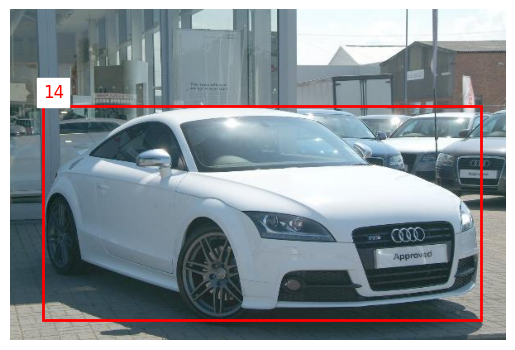

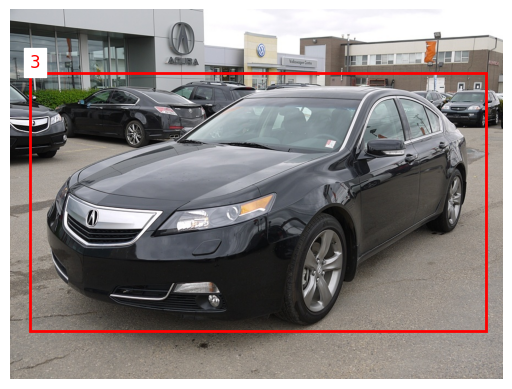

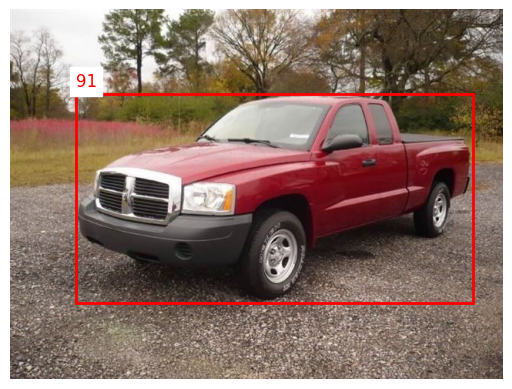

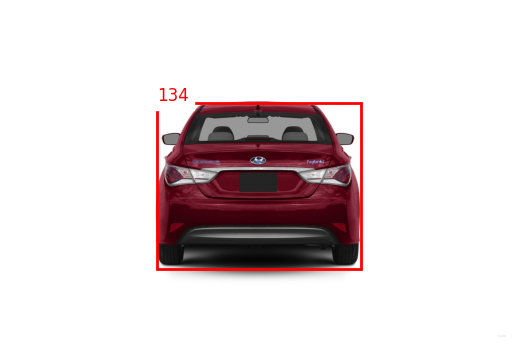

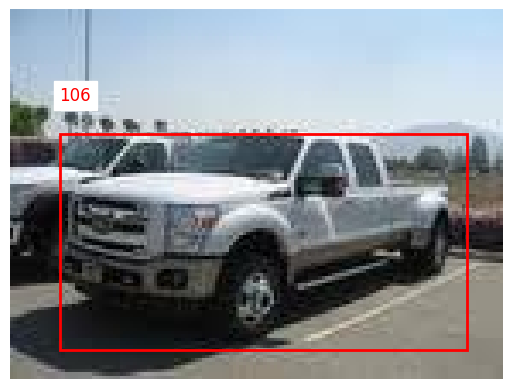

Displayed 5 training images with bounding boxes.


In [30]:
# for training images
print("For Training Images") # Changed message to "Test Image"
displayed_image_count = 0  # Initialize a counter to track displayed images

image_paths_details_training=[]
images_paths_details_testing=[]

for index, row in train_annotations_df.iterrows():
    if displayed_image_count >= 5: # Check if we've already displayed two images
        break  # If yes, exit the loop

    image_name = str(row['Image Name']).strip()
    image_path = None # Initialize image_path to None


    for class_folder in train_class_folders:
        potential_image_path = os.path.join(class_folder, image_name)
        if os.path.exists(potential_image_path):
            image_path = potential_image_path
            image_paths_details_training.append(potential_image_path)
            break # Image found, no need to check other class folders

    if image_path: # If image_path is found (not None)
        annotation = {
            'bbox': [row['Bounding Box coordinates_xmin'], row['Bounding Box coordinates_ymin'], row['Bounding Box coordinates_xmax'], row['Bounding Box coordinates_ymax']],
            'image_class' : row['Image class']
        }
        display_image_with_bbox(image_path, annotation)
        displayed_image_count += 1 # Increment the counter
    #else:
    #    print(f"Training Image not found: {image_name}")

print(f"Displayed {displayed_image_count} training images with bounding boxes.")

For Testing Images


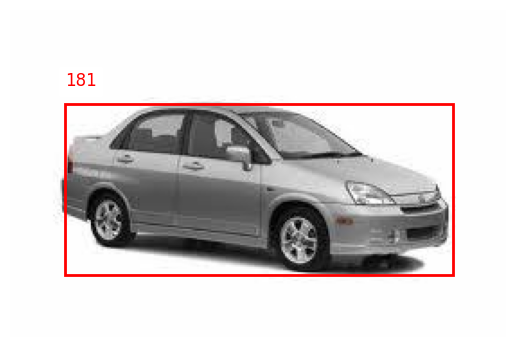

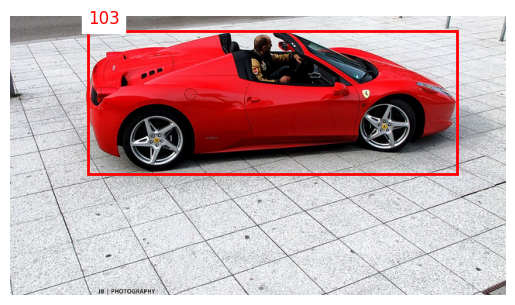

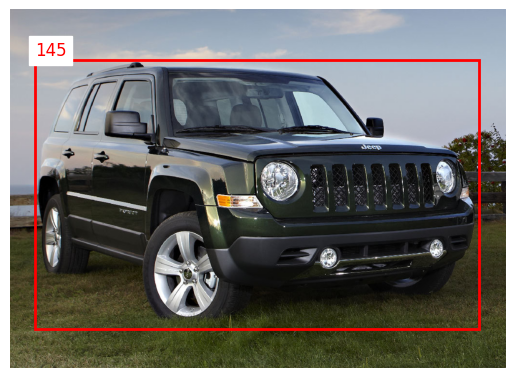

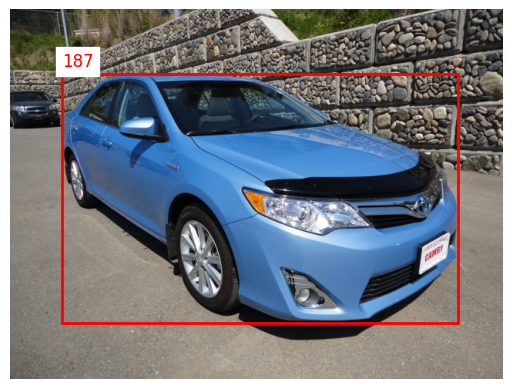

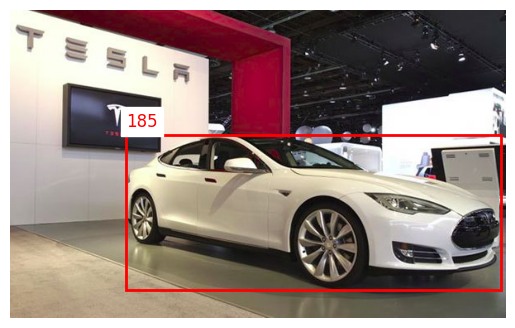

Displayed 5 test images with bounding boxes.


In [31]:

# for test images
print("For Testing Images") # Changed message to "Test Image"
displayed_image_count_test = 0  # Initialize a counter to track displayed images

for index, row in test_annotations_df.iterrows():  # Use test_annotations_df DataFrame
    if displayed_image_count_test >= 5: # Check if we've already displayed two images (adjust number here if you want 5 or more)
        break  # If yes, exit the loop

    image_name_test = str(row['Image Name']).strip()
    image_path_test = None # Initialize image_path_test to None

    for class_folder in test_class_folders: # Use test_class_folders
        potential_image_path_test = os.path.join(class_folder, image_name_test)
        if os.path.exists(potential_image_path_test):
            image_path_test = potential_image_path_test # Assigned to image_path_test
            images_paths_details_testing.append(potential_image_path)
            break # Image found, no need to check other class folders

    if image_path_test: # If image_path_test is found (not None)
        annotation_test = {
            'bbox': [row['Bounding Box coordinates_xmin'], row['Bounding Box coordinates_ymin'], row['Bounding Box coordinates_xmax'], row['Bounding Box coordinates_ymax']],
            'image_class' : row['Image class'] # Assuming 'Image class' column also exists in test_annotations_df (verify!)
        }
        display_image_with_bbox(image_path_test, annotation_test)  # Changed here
        displayed_image_count_test += 1 # Increment the counter
    #else:
    #    print(f"Test Image not found: {image_name_test}") # Changed message to "Test Image"

print(f"Displayed {displayed_image_count_test} test images with bounding boxes.") # Changed message to "test images"




6. Design Basic CNN Models


The Models designed are:

1. MobileNetV2
2. GoogleNet
3. AlexNet
4. U-Net

In [32]:
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Load and preprocess an image for CNN input.
    """
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Warning: Image file not found: {image_path}")
        return None  # Or handle the missing image in a way that makes sense for your application

    image = cv2.imread(image_path)  # Load image

    # Check if image loading was successful
    if image is None:
        print(f"Warning: Failed to load image: {image_path}")
        return None  # Or handle the loading error as needed

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, target_size)  # Resize to target size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

In [33]:
def custom_generator(df, batch_size, target_size):
    """
    Custom generator for images and labels.
    """
    num_samples = len(df)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_samples = df.iloc[offset:offset + batch_size]
            images = []
            labels = []
            for _, row in batch_samples.iterrows():
                image = preprocess_image(row['Image_Path'], target_size)
                label = row['label_categorical']
                images.append(image)
                labels.append(label)
            X = np.array(images)
            y = np.array(labels)
            yield X, y

In [34]:
# Apply preprocessing to all images
df_testing['image'] = df_testing['Image_Path'].apply(preprocess_image)
df_training['image'] = df_training['Image_Path'].apply(preprocess_image)

# Check for and handle None values in the 'image' column
df_testing = df_testing.dropna(subset=['image'])  # Remove rows with None in 'image'
df_training = df_training.dropna(subset=['image'])  # Remove rows with None in 'image'

In [35]:
# Encode labels
label_encoder = LabelEncoder()
df_testing['labels_encoded'] = label_encoder.fit_transform(df_testing['labels'])
df_training['labels_encoded'] = label_encoder.fit_transform(df_training['labels'])

# Convert labels to categorical (one-hot encoding)
df_testing['label_categorical'] = df_testing['labels_encoded'].apply(lambda x: to_categorical(x, num_classes=len(test_class_folders)))
df_training['label_categorical'] = df_training['labels_encoded'].apply(lambda x: to_categorical(x, num_classes=len(test_class_folders)))

In [36]:
# Create generators
batch_size = 32
train_generator = custom_generator(df_training, batch_size, target_size=(224, 224))
val_generator = custom_generator(df_testing, batch_size, target_size=(224, 224))

In [37]:
# Check training generator
X_batch, y_batch = next(train_generator)
print("Training batch shape:", X_batch.shape, y_batch.shape)

# Check validation generator
X_batch, y_batch = next(val_generator)
print("Validation batch shape:", X_batch.shape, y_batch.shape)

Training batch shape: (32, 224, 224, 3) (32, 196)
Validation batch shape: (32, 224, 224, 3) (32, 196)


6A. MobileNetV2

In [38]:
from sklearn.utils.class_weight import compute_class_weight

In [39]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  # Use 128x128 for speed

In [40]:
# Freeze all but last 4 layers for efficient training
for layer in base_model.layers[:-4]:  
    layer.trainable = False  

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces parameters
x = BatchNormalization()(x)  # Stabilizes training
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)  # Dropout for regularization
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)  # Output layer

In [41]:
df_train_mobilenet, df_val_mobilenet = train_test_split(df_training, test_size=0.2, random_state=42)


In [42]:
mobilenet_batch_size=16
#df_train_mobilenet_sampled = df_train.sample(frac=0.5, random_state=42)  # Use 50% of training data
#df_val_mobilenet_sampled = df_val.sample(frac=0.5, random_state=42)  # Use 50% of validation data
#mobilenet_train_generator = custom_generator(df_train_sampled, batch_size, target_size=(224, 224))
#mobilenet_val_generator = custom_generator(df_val_sampled, batch_size, target_size=(224, 224))
df_train_mobilenet_gen = custom_generator(df_train_mobilenet,mobilenet_batch_size,target_size=(128,128))
df_val_mobilenet_gen = custom_generator(df_val_mobilenet,mobilenet_batch_size,target_size=(128,128))
    

In [45]:
# Create the model
mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()

# Define steps per epoch
steps_per_epoch = np.ceil(len(df_train_mobilenet) / mobilenet_batch_size).astype(int)
validation_steps = np.ceil(len(df_val_mobilenet) / mobilenet_batch_size).astype(int)

y_true = np.array(df_train_mobilenet['labels_encoded'].tolist())

# Compute class weights based on actual class distribution
class_weights = compute_class_weight('balanced', classes=np.unique(y_true), y=y_true)
class_weight_dict = dict(enumerate(class_weights))

#predicting
history_mobilenet = mobilenet_model.fit(
     df_train_mobilenet_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=df_val_mobilenet_gen,
    validation_steps=validation_steps,
    epochs=10  # Reduce epochs to speed up training
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,452,356 (9.35 MB)

 Trainable params: 604,612 (2.31 MB)

 Non-trainable params: 1,847,744 (7.05 MB)

Epoch 1/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.0089 - loss: 5.5679 - val_accuracy: 0.0270 - val_loss: 5.0764
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 70s 172ms/step - accuracy: 0.0817 - loss: 4.5535 - val_accuracy: 0.0638 - val_loss: 4.7132
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 71s 174ms/step - accuracy: 0.1910 - loss: 3.9394 - val_accuracy: 0.0896 - val_loss: 4.4297
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 71s 174ms/step - accuracy: 0.2879 - loss: 3.4278 - val_accuracy: 0.1271 - val_loss: 4.2024
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 72s 176ms/step - accuracy: 0.3901 - loss: 2.9540 - val_accuracy: 0.1486 - val_loss: 4.0196
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 71s 173ms/step - accuracy: 0.4708 - loss: 2.5770 - val_accuracy: 0.1670 - val_loss: 3.8666
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 69s 168ms/step - accuracy: 0.5575 - loss: 2.2051 - val_accuracy: 0.1793 - val_loss: 3.7640
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 66s 163ms/step - accuracy: 0.6271 - loss: 1

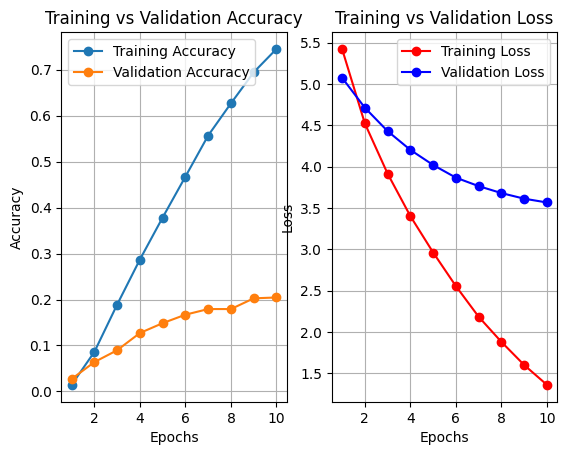

In [46]:
# Extract history data
train_loss = history_mobilenet.history['loss']
val_loss = history_mobilenet.history['val_loss']
train_acc = history_mobilenet.history['accuracy']
val_acc = history_mobilenet.history['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)  # Number of epochs
# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o', color='red')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()

# Show the plots
plt.show()

In [47]:
y_true = []
y_pred = []
for i in range(validation_steps):  # Loop through validation batches
    X_val_batch, y_val_batch = next(df_val_mobilenet_gen)  # Fetch batch
    
    # Step 2: Predict class probabilities
    y_pred_batch = mobilenet_model.predict(X_val_batch)
    
    # Step 3: Convert softmax probabilities to class labels (indices)
    y_pred_labels = np.argmax(y_pred_batch, axis=1)
    y_true_labels = np.argmax(y_val_batch, axis=1)

    y_pred.extend(y_pred_labels)  # Store predicted labels
    y_true.extend(y_true_labels)  # Store true labels

# Step 4: Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_,zero_division=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [51]:
# Get all class indices from label encoder
all_classes = set(range(len(label_encoder.classes_)))  # All expected class indices
predicted_classes = set(y_pred)  # Classes actually predicted

# Find missing classes (classes that were never predicted)
missing_classes = all_classes - predicted_classes

print("Classes that were never predicted:", missing_classes)
# Check if the missing classes exist in the dataset
for missing_class in missing_classes:
    print(f"Class {missing_class} ({label_encoder.classes_[missing_class]}) has {class_distribution.get(missing_class, 0)} samples in training data")

Classes that were never predicted: {113}
Class 113 (Ford Freestar Minivan 2007) has 15 samples in training data


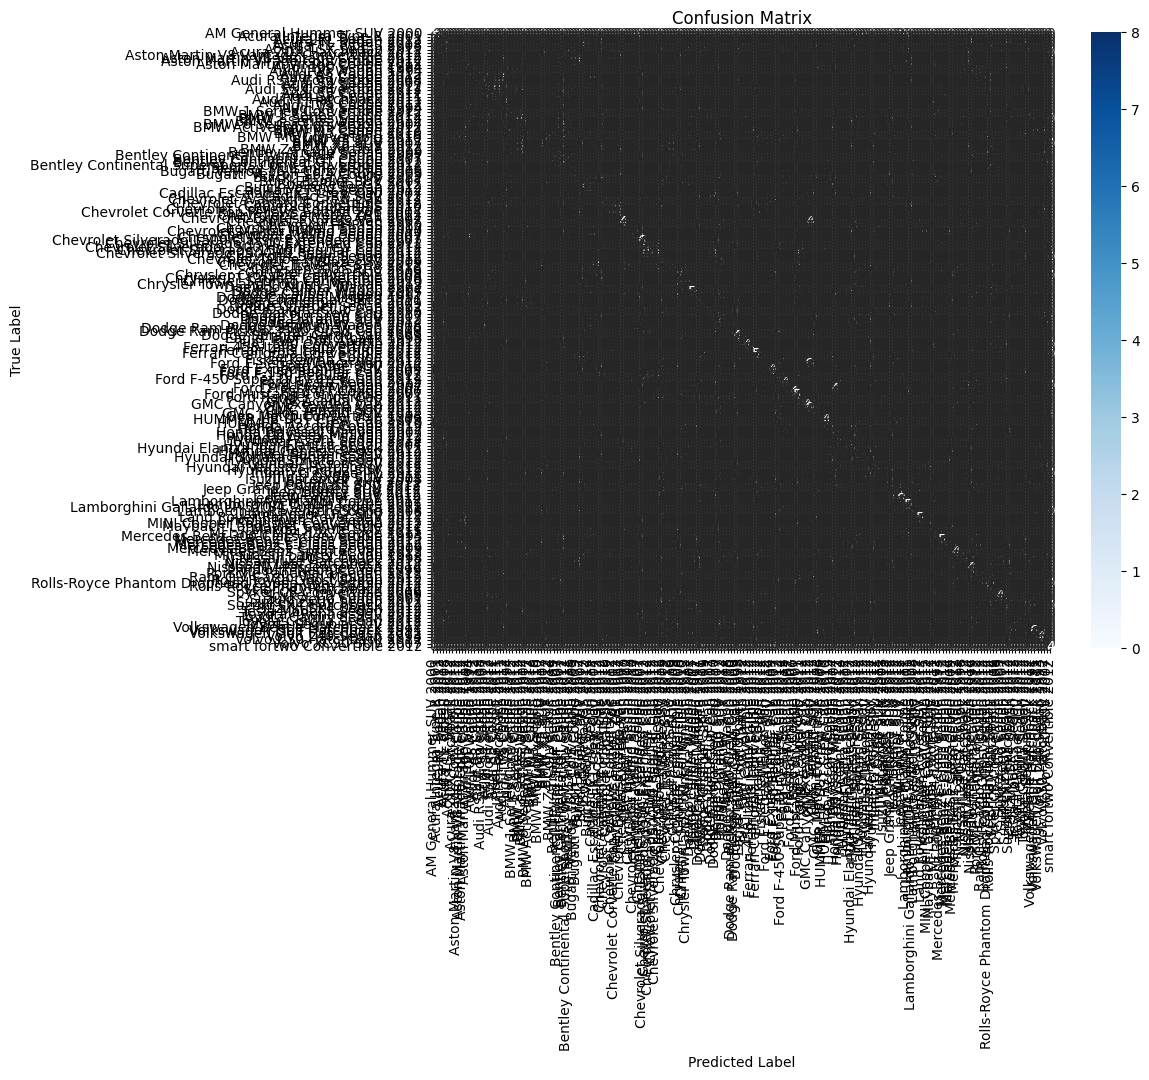

In [49]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##### **MobileNet Model Summary**

6B. GoogleNet

In [ ]:
train_images = []
for img_path in df_training['Image_Path'].head(20):  # Iterate through image paths
    img = load_img(img_path, target_size=(224, 224))  # Load the image
    img_array = img_to_array(img)  # Convert to NumPy array
    train_images.append(img_array)  # Add to the list

train_images = np.array(train_images)  # Convert list to NumPy array

# --- Apply resizing if needed ---
train_images = np.array([cv2.resize(img, (224, 224)) for img in train_images])

train_labels = np.stack(df_training['label_categorical'].head(20).values)


# Similarly for test images:
test_images = []
for img_path in df_testing['Image_Path'].head(20):  # Iterate through image paths
    img = load_img(img_path, target_size=(224, 224))  # Load the image
    img_array = img_to_array(img)  # Convert to NumPy array
    test_images.append(img_array)  # Add to the list

test_images = np.array(test_images)  # Convert list to NumPy array

# --- Apply resizing if needed ---
test_images = np.array([cv2.resize(img, (224, 224)) for img in test_images])

test_labels = np.stack(df_testing['label_categorical'].head(20).values)

# Check shapes
print(f"train_images shape: {train_images.shape}")
print(f"train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}")
print(f"test_labels shape: {test_labels.shape}")

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(196, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Convert to numpy arrays
# Ensure all images have the same shape before stacking

# Ensure the model summary is called after defining the model
model.summary()

# Train the model
model.fit(
    train_images,  # Preprocessed training images
    train_labels,  # One-hot encoded training labels
    epochs=10,
    batch_size=32,
    validation_data=(test_images, test_labels)
)

In [ ]:
from sklearn.metrics import precision_score, classification_report

y_pred_probabilities = model.predict(test_images)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)
y_true_labels = np.argmax(test_labels, axis=1)

precision = precision_score(y_true_labels, y_pred_labels, average='macro', zero_division=1)
print(f"Precision: {precision}")

report = classification_report(y_true_labels, y_pred_labels, zero_division=1)
print(report)

6C. AlexNet

In [ ]:
# Define paths
image_dir = 'Car_Images/Car Images/Test Images'  # Adjust based on your directory structure

# Prepare data
images = []
labels = []

for index, row in test_annotations_df.iterrows():
    image_name = row['Image Name']
    #image_path = os.path.join(image_dir, image_name)
    #image_path = find_image_path(image_name, os.path.join('Car_Images', 'Car Images', 'Test Images'))  # Search in subfolders

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (227, 227))  # Resize to 227x227 pixels (AlexNet input size)
    images.append(image)

    # Assuming 'Image class' contains the class label
    labels.append(row['Image class'])

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
unique_classes = np.unique(labels)


In [ ]:
def create_alexnet_model(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Layer
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Layer
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fourth Convolutional Layer
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fifth Convolutional Layer
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the model
input_shape = (224, 224, 3)  # Image dimensions for AlexNet
num_classes = len(unique_classes)
model = create_alexnet_model(input_shape, num_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

model.summary()

# Train the model
model.fit(
    train_images,  # Preprocessed training images
    train_labels,  # One-hot encoded training labels
    epochs=10,
    batch_size=32,
    validation_data=(test_images, test_labels)
)

6D. U-Net

In [ ]:
train_images = np.random.rand(100, 128, 128, 3)
train_masks = np.random.rand(100, 128, 128, 1)

def unet_model(input_size=(128, 128, 3)):
    inputs = keras.Input(shape=input_size)

    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Decoder
    up5 = layers.UpSampling2D(size=(2, 2))(conv4)
    concat5 = layers.Concatenate()([up5, conv3])
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(concat5)
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up6 = layers.UpSampling2D(size=(2, 2))(conv5)
    concat6 = layers.Concatenate()([up6, conv2])
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concat6)
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.UpSampling2D(size=(2, 2))(conv6)
    concat7 = layers.Concatenate()([up7, conv1])
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat7)
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    model = keras.Model(inputs, outputs)
    return model

# Compile model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train the model
model.fit(train_images, train_masks, epochs=10, batch_size=16, validation_split=0.1)

7. Summary